In [57]:
#data loading
import pandas as pd
filename="/content/sample_data/dirty_cafe_sales.csv"
a=pd.read_csv(str(filename))
a=a.drop('Transaction Date',axis=1)
print(a)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location  
0        Credit Card  Takeaway  
1               Cash  In-store  
2        Credit Card  In-store  
3            UNKNOWN   UNKNOWN  
4     

In [58]:
print(a.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location  
0  Takeaway  
1  In-store  
2  In-store  
3   UNKNOWN  
4  In-store  


In [59]:
print(a.tail())

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location  
9995             NaN   UNKNOWN  
9996  Digital Wallet       NaN  
9997  Digital Wallet       NaN  
9998  Digital Wallet       NaN  
9999            Cash  In-store  


In [60]:

##Checking for null values
a.isna().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265


In [61]:
stringColumns={1,5,6}
intColumns={2,3,4}
fillStringValue="0"
fillIntValue=0
for s in stringColumns:
    a[a.columns[s]]=a[a.columns[s]].fillna(fillStringValue)
for y in intColumns:
    a[a.columns[y]]=a[a.columns[y]].fillna(fillIntValue)



In [143]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="Total Spent"

#convert integer columns to string before applying fit_transform
columns_tostr={2,3,4}
for index in columns_tostr:
   a[a.columns[index]]=a[a.columns[index]].astype(str)

#transform string into int
transformColumns={0,1,2,3,4,5,6}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)


      Transaction ID  Item  Quantity  Price Per Unit  Total Spent  \
0               1056     2         2               3           13   
1               4473     1         4               4            6   
2               3698     3         4               1            2   
3               6754     6         2               6            5   
4               2436     2         2               3           13   
...              ...   ...       ...             ...          ...   
9995            7446     2         2               3           13   
9996            9618     0         3               0           12   
9997            4775     2         4               3           18   
9998            7474     3         3               0           12   
9999            5773     7         3               5            6   

      Payment Method  Location  
0                  2         3  
1                  1         2  
2                  2         2  
3                  5         4  
4     

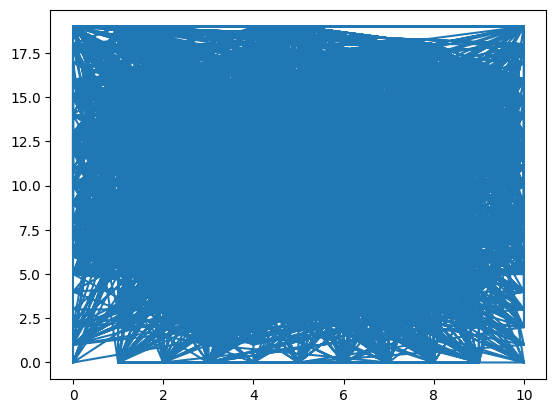

In [144]:
from matplotlib import pyplot as plt

target="Total Spent"
index=1
plt.plot(a[a.columns[index]],a[str(target)])


<BarContainer object of 10000 artists>

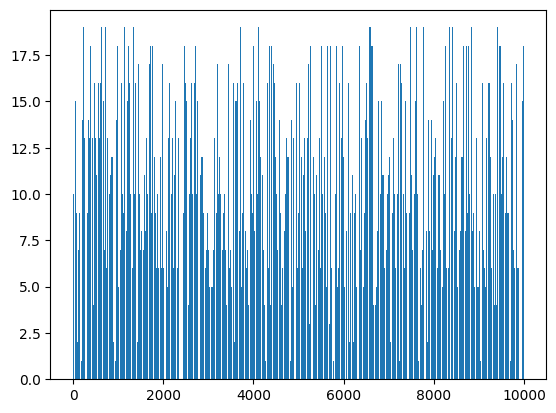

In [145]:
plt.bar(a[a.columns[0]],a[str(target)])

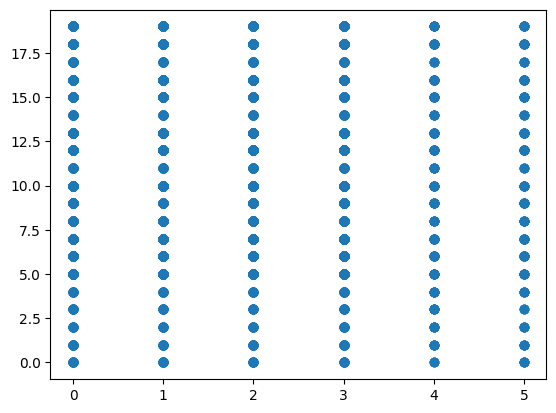

In [146]:
plt.scatter(a[a.columns[5]], a[str(target)])

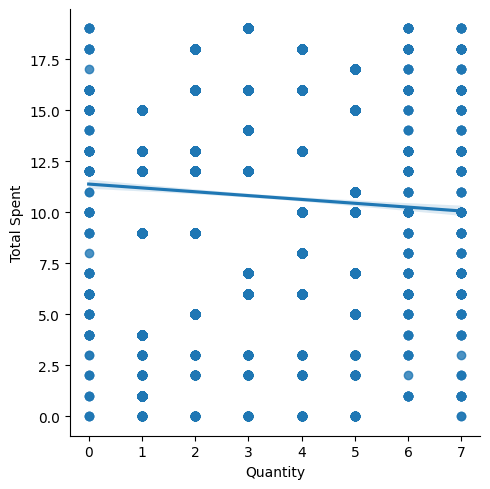

In [147]:
import seaborn as sns

a['Quantity'] = pd.to_numeric(a['Quantity'])
a['Total Spent'] = pd.to_numeric(a['Total Spent'])
sns.lmplot(x="Quantity",y="Total Spent",data=a)

<Axes: xlabel='Quantity', ylabel='Total Spent'>

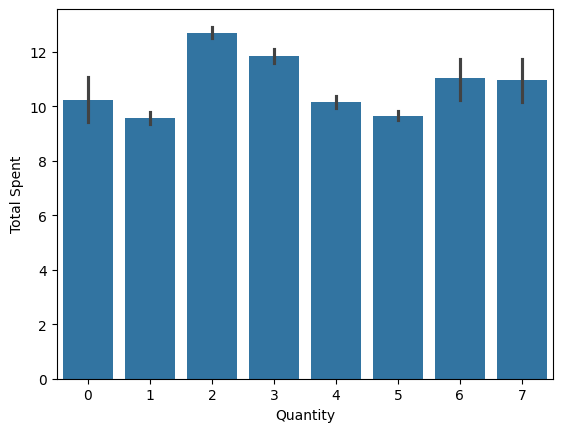

In [148]:
sns.barplot(x=a.columns[2],y=str(target),data=a)

<Axes: xlabel='Price Per Unit', ylabel='Total Spent'>

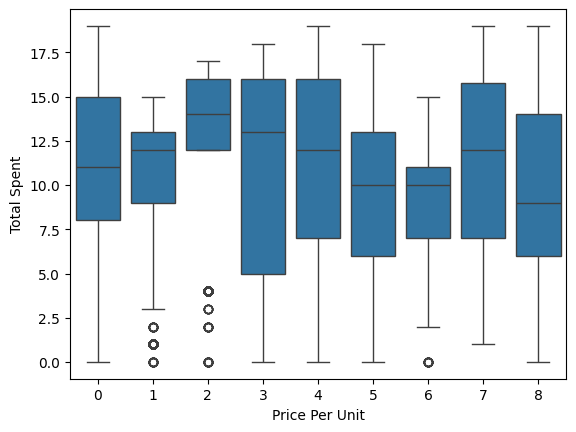

In [149]:
sns.boxplot(x=a.columns[3],y=str(target),data=a)

<ipython-input-151-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='Total Spent', ylabel='Density'>

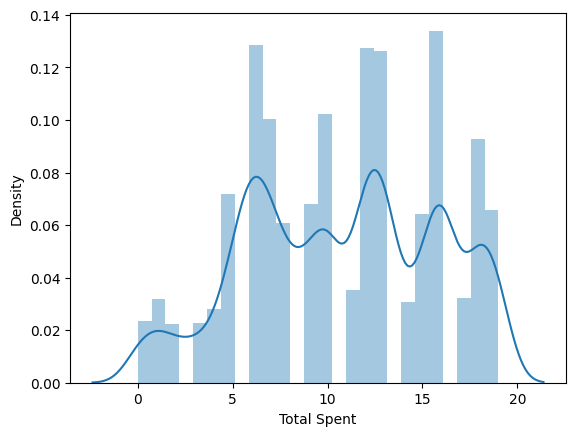

In [151]:
sns.distplot(a[str(target)])

<Axes: xlabel='Item', ylabel='Density'>

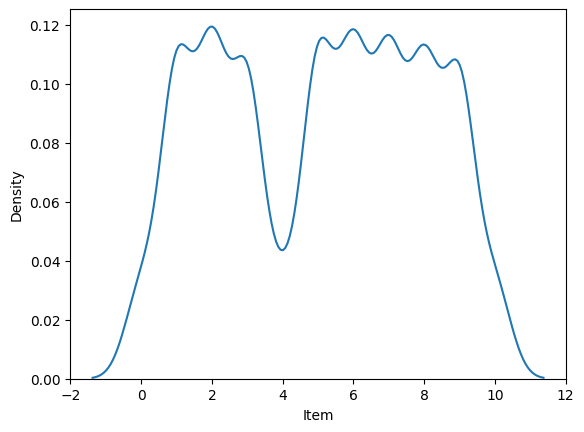

In [152]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='Item', ylabel='count'>

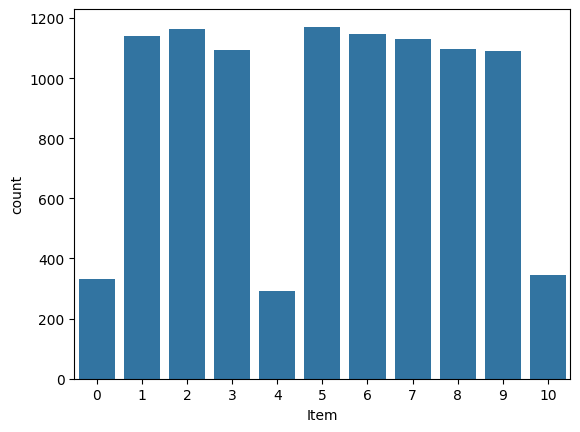

In [153]:
sns.countplot(x=a.columns[1],data=a)

<Axes: >

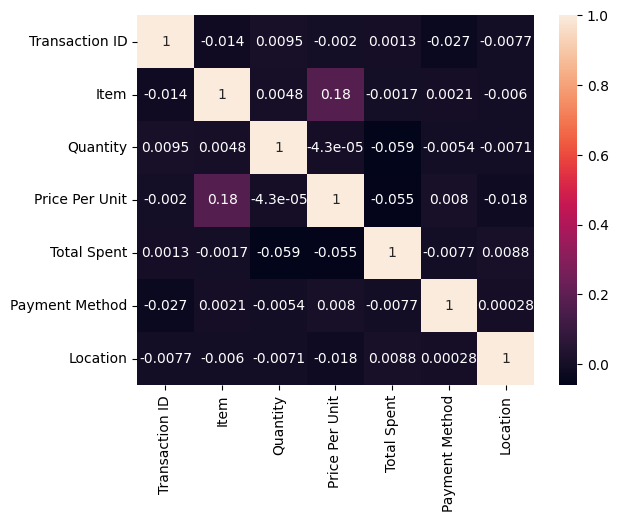

In [154]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

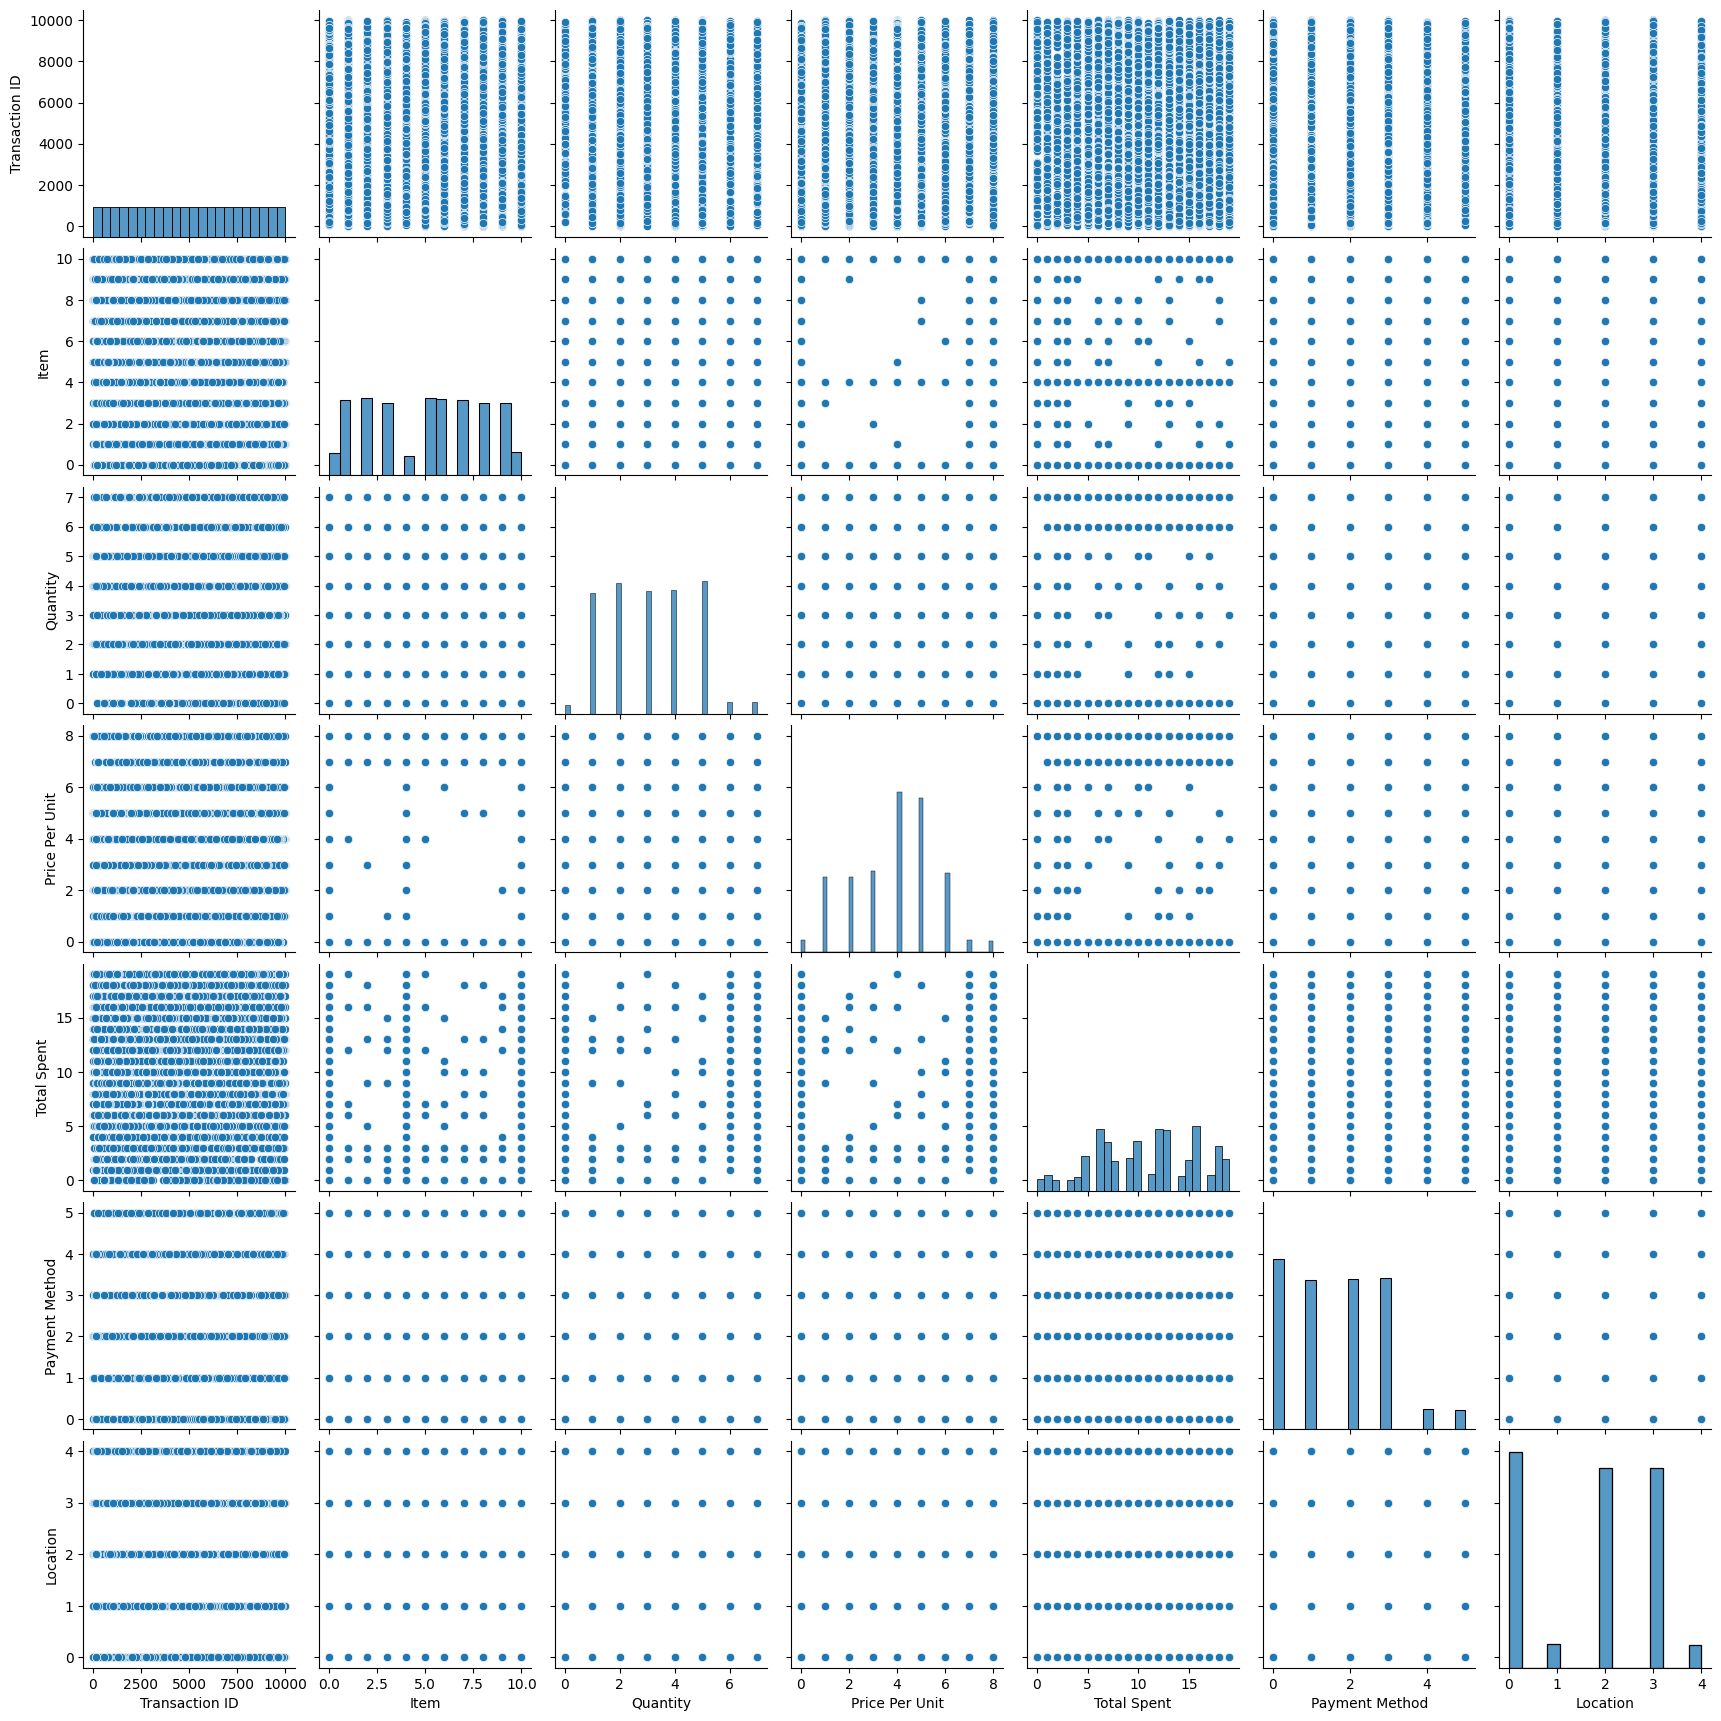

In [155]:
sns.pairplot(data=a)

In [156]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      Transaction ID  Item  Quantity  Price Per Unit  Payment Method  Location
0               1056     2         2               3               2         3
1               4473     1         4               4               1         2
2               3698     3         4               1               2         2
3               6754     6         2               6               5         4
4               2436     2         2               3               3         2
...              ...   ...       ...             ...             ...       ...
9995            7446     2         2               3               0         4
9996            9618     0         3               0               3         0
9997            4775     2         4               3               3         0
9998            7474     3         3               0               3         0
9999            5773     7         3               5               1         2

[10000 rows x 6 columns]


In [157]:
print(y)

0       13
1        6
2        2
3        5
4       13
        ..
9995    13
9996    12
9997    18
9998    12
9999     6
Name: Total Spent, Length: 10000, dtype: int64


In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [159]:
print(x_train)

      Transaction ID  Item  Quantity  Price Per Unit  Payment Method  Location
8951            2933     8         1               0               0         0
305             7248     6         3               6               1         0
3434            6114    10         1               7               2         0
5444            7500     9         6               2               2         3
9213            4135     6         1               6               0         0
...              ...   ...       ...             ...             ...       ...
9832            2604     9         6               2               4         2
898             1231     5         2               4               0         3
2060            5771     5         5               4               2         0
9796            8030     3         2               8               3         2
6730            7689     6         4               6               2         4

[8000 rows x 6 columns]


In [160]:
print(y_train)

8951    13
305      7
3434    13
5444    12
9213    15
        ..
9832     4
898     16
2060     7
9796     9
6730    10
Name: Total Spent, Length: 8000, dtype: int64


In [161]:
print(x_test)

      Transaction ID  Item  Quantity  Price Per Unit  Payment Method  Location
2771            2636     6         3               6               3         2
737             8007     6         5               6               0         2
7212             531     7         3               5               2         2
6327            4403     5         3               4               0         0
246              985     9         2               2               0         4
...              ...   ...       ...             ...             ...       ...
5002            1672     2         2               3               0         3
7336            9468     2         3               3               1         3
4913            4070     2         1               3               2         0
4925            7885     8         4               5               2         0
825             4328     6         2               6               0         3

[2000 rows x 6 columns]


In [162]:
print(y_test)

2771     7
737     11
7212     6
6327    19
246     12
        ..
5002    13
7336    16
4913     9
4925     8
825      5
Name: Total Spent, Length: 2000, dtype: int64


In [163]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [164]:
print(ypred)

[10.44025266 10.16566322 10.62273908 ... 11.18512572 10.35869703
 10.7756054 ]


In [166]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [167]:
print(ypred)

[ 7. 11.  6. ...  9.  8.  5.]


In [170]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [171]:
print(ypred)

[ 7.   10.35  6.   ...  8.93  7.76  5.  ]
